In [10]:
from instance import *
from evaluator import *

import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

# 03/out

In [11]:
def display_grid_and_path(inst, evaluator, path):
    """
    Display a grid with nodes and path coverage visualization.
    
    Args:
        inst: AgcspInstance object containing grid_nodes and obstacle_nodes
        evaluator: AgcspEvaluator object to calculate coverage
        path: List of (row, col) tuples representing the path
    """
    covered_nodes = evaluator.get_covered_nodes_list(path)
    
    total_nodes = len(inst.grid_nodes)
    covered_count = len(covered_nodes)
    coverage_percentage = (covered_count / total_nodes) * 100 if total_nodes > 0 else 0
    
    # Check for obstacle coverage
    covered_obstacles = []
    obstacle_warning = ""
    if hasattr(inst, 'obstacle_nodes') and len(inst.obstacle_nodes) > 0:
        covered_set = set(map(tuple, covered_nodes))
        covered_obstacles = [obs for obs in inst.obstacle_nodes if tuple(obs) in covered_set]
        if covered_obstacles:
            obstacle_warning = f"{len(covered_obstacles)} obstacles covered!"
    
    plt.figure(figsize=(12, 10))
    
    # Plot valid nodes
    plt.scatter(inst.grid_nodes[:, 1], inst.grid_nodes[:, 0], c='#AAAAAA', s=3, 
               label='Uncovered Nodes', alpha=0.7)
    
    if len(covered_nodes) > 0:
        plt.scatter(covered_nodes[:, 1], covered_nodes[:, 0], c='#00AA44', s=4, 
                   label='Covered Nodes', alpha=0.8)
    
    # Plot obstacles
    if hasattr(inst, 'obstacle_nodes') and len(inst.obstacle_nodes) > 0:
        plt.scatter(inst.obstacle_nodes[:, 1], inst.obstacle_nodes[:, 0], c='#CC0000', s=4, 
                   marker='s', label='Obstacles', linewidths=0.5)
        
        # Highlight covered obstacles
        if covered_obstacles:
            covered_obstacles_arr = np.array(covered_obstacles)
            plt.scatter(covered_obstacles_arr[:, 1], covered_obstacles_arr[:, 0], 
                       c='#FF6600', s=10, marker='D', 
                       linewidths=2, label='Covered Obstacles')
    
    # Plot path
    path_arr = np.array(path)
    plt.plot(path_arr[:, 1], path_arr[:, 0], color='#9900CC', linewidth=3, 
             label='Sprayer Path', marker='o', markersize=6, markerfacecolor='white', 
             markeredgecolor='#9900CC', markeredgewidth=2)
    
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.legend(loc='upper right', framealpha=0.9)
    
    title = f'Coverage: {covered_count}/{total_nodes} nodes ({coverage_percentage:.1f}%){obstacle_warning}'
    plt.title(title, fontsize=12, fontweight='bold')
    
    print(f"Coverage: {covered_count}/{total_nodes} nodes ({coverage_percentage:.1f}%)")
    if hasattr(inst, 'obstacle_nodes') and len(inst.obstacle_nodes) > 0:
        print(f"Obstacles: {len(covered_obstacles)}/{len(inst.obstacle_nodes)} covered")
        if covered_obstacles:
            print("WARNING: Sprayer is covering obstacles!")
    
    plt.show()

In [12]:
# Create a circular grid with inner obstacles
center_r, center_c = 100, 100
outer_radius = 80
inner_radius = 30
r_grid, c_grid = np.mgrid[0:200, 0:200]
dist_from_center = np.sqrt((r_grid - center_r)**2 + (c_grid - center_c)**2)
grid_nodes = np.argwhere(dist_from_center <= outer_radius)
obstacle_nodes = np.argwhere(dist_from_center <= inner_radius)

circular_inst = AgcspInstance(grid_nodes, obstacle_nodes, 15)
circular_evaluator = AgcspEvaluator(circular_inst)

Coverage: 2959/20081 nodes (14.7%)
Obstacles: 885/2821 covered


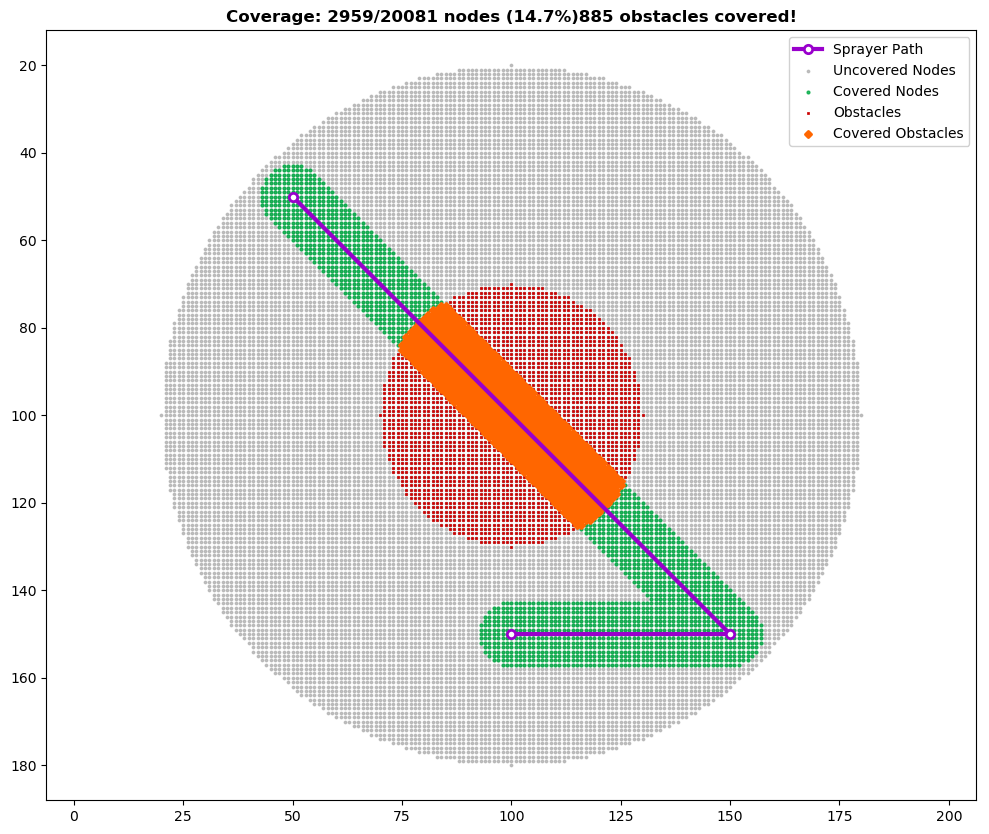

In [13]:
path=[(50, 50), (150, 150), (150, 100)]
display_grid_and_path(circular_inst, circular_evaluator, path)

In [14]:
sol = AgcspSolution(path)
display(circular_evaluator.calculate_coverage_proportion(sol))
display(sol._hits_obstacle)
circular_evaluator._calculate_manouver_complexity_penalty(sol)

Caching value for calculate_coverage_proportion


0.1473532194611822

True

Caching value for _calculate_manouver_complexity_penalty


1.7071067811865475

In [15]:
circular_evaluator.evaluate_objfun(sol)

Caching value for evaluate_objfun
Using cached value for calculate_coverage_proportion
Caching value for _calculate_travelled_distance
Using cached value for _calculate_manouver_complexity_penalty


193.98110979903487